# WeatherPy
Note
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)
city = citipy

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
print(cities)

['umm kaddadah', 'hasaki', 'puerto ayora', 'okhotsk', 'sao filipe', 'geraldton', 'new norfolk', 'kharp', 'nanortalik', 'albany', 'cayenne', 'kruisfontein', 'daru', 'norman wells', 'mys shmidta', 'barentsburg', 'atuona', 'east london', 'ushuaia', 'rikitea', 'hilo', 'busselton', 'edd', 'provideniya', 'dikson', 'taolanaro', 'mar del plata', 'dembi dolo', 'tuktoyaktuk', 'sobolevo', 'belushya guba', 'orlik', 'effium', 'tasiilaq', 'quatre cocos', 'san patricio', 'pevek', 'meiganga', 'hobart', 'genhe', 'mataura', 'westport', 'ambodifototra', 'qaanaaq', 'kavaratti', 'labrea', 'butaritari', 'punta arenas', 'lebu', 'khatanga', 'pampa', 'marawi', 'puerto escondido', 'amderma', 'carnarvon', 'ciro marina', 'kapaa', 'cody', 'thompson', 'samfya', 'bredasdorp', 'hermanus', 'finschhafen', 'port alfred', 'arraial do cabo', 'manggar', 'les cayes', 'lar', 'upernavik', 'arbagar', 'micheweni', 'nikolskoye', 'cape town', 'bethel', 'jalu', 'vaini', 'haines junction', 'sentyabrskiy', 'jamestown', 'bucerias', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Data list of Cities
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
date = []
counter = 0
record_counter = 0
setcount = 1


for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter =0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing record" + str(record_counter) +"of Set" + str(setcount) +"|" +city)
    try: 
        weather_response = requests.get(f"{url}{city}&appid={weather_api_key}").json()
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City Not Found, Pass...:" + city)

        
print(len(weather_response))      


processing record1of Set1|umm kaddadah
processing record2of Set1|hasaki
processing record3of Set1|puerto ayora
processing record4of Set1|okhotsk
processing record5of Set1|sao filipe
processing record6of Set1|geraldton
processing record7of Set1|new norfolk
processing record8of Set1|kharp
processing record9of Set1|nanortalik
processing record10of Set1|albany
processing record11of Set1|cayenne
processing record12of Set1|kruisfontein
processing record13of Set1|daru
processing record14of Set1|norman wells
processing record15of Set1|mys shmidta
City Not Found, Pass...:mys shmidta
processing record16of Set1|barentsburg
City Not Found, Pass...:barentsburg
processing record17of Set1|atuona
processing record18of Set1|east london
processing record19of Set1|ushuaia
processing record20of Set1|rikitea
processing record21of Set1|hilo
processing record22of Set1|busselton
processing record23of Set1|edd
processing record24of Set1|provideniya
processing record25of Set1|dikson
processing record26of Set1|t

processing record8of Set5|talnakh
processing record9of Set5|svetlogorsk
processing record10of Set5|bengkulu
processing record11of Set5|meyungs
City Not Found, Pass...:meyungs
processing record12of Set5|skelleftea
processing record13of Set5|mazatlan
processing record14of Set5|usinsk
processing record15of Set5|roald
processing record16of Set5|tawkar
City Not Found, Pass...:tawkar
processing record17of Set5|fundacion
processing record18of Set5|geresk
City Not Found, Pass...:geresk
processing record19of Set5|mount isa
processing record20of Set5|kodiak
processing record21of Set5|morondava
processing record22of Set5|bereslavka
processing record23of Set5|hualmay
processing record24of Set5|fare
processing record25of Set5|umm durman
City Not Found, Pass...:umm durman
processing record26of Set5|puksoozero
processing record27of Set5|bousso
processing record28of Set5|nam tha
City Not Found, Pass...:nam tha
processing record29of Set5|oranjemund
processing record30of Set5|saint-denis
processing reco

processing record16of Set9|lazy
processing record17of Set9|zaraza
processing record18of Set9|sao francisco de paula
processing record19of Set9|qurayyat
processing record20of Set9|college station
processing record21of Set9|canmore
processing record22of Set9|san cristobal
processing record23of Set9|khash
processing record24of Set9|diego de almagro
processing record25of Set9|acapulco
processing record26of Set9|christchurch
processing record27of Set9|touros
processing record28of Set9|gemena
processing record29of Set9|mercedes
processing record30of Set9|el tular
processing record31of Set9|tokmak
processing record32of Set9|bolungarvik
City Not Found, Pass...:bolungarvik
processing record33of Set9|boa vista
processing record34of Set9|yagodnoye
processing record35of Set9|vinh
processing record36of Set9|marrakesh
processing record37of Set9|ponta do sol
processing record38of Set9|qaqortoq
processing record39of Set9|havre-saint-pierre
processing record40of Set9|trincomalee
processing record41of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Creating a DataFrame
city_data_df = pd.DataFrame({"City":city_list,
                         "Lat":lat_list,
                         "Lng":lng_list,
                         "Max Temp":max_temp_list,
                         "Humidity":humidity_list,
                         "Cloudiness":cloudiness_list,
                         "Wind Speed":windspeed_list,
                            })

pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Umm Kaddadah,13.6017,26.6876,311.27,19,76,2.99
1,Hasaki,35.7333,140.8333,293.37,92,100,8.96
2,Puerto Ayora,-0.7393,-90.3518,297.90,85,81,3.13
3,Okhotsk,59.3833,143.3000,273.45,89,34,2.27
4,São Filipe,14.8961,-24.4956,296.91,77,70,3.52


In [6]:
weather_dict = {"City":city_list,
                         "Lat":lat_list,
                         "Lng":lng_list,
                         "Max Temp":max_temp_list,
                         "Humidity":humidity_list,
                         "Cloudiness":cloudiness_list,
                         "Wind Speed":windspeed_list,
}
weather_dict

{'City': ['Umm Kaddadah',
  'Hasaki',
  'Puerto Ayora',
  'Okhotsk',
  'São Filipe',
  'Geraldton',
  'New Norfolk',
  'Kharp',
  'Nanortalik',
  'Albany',
  'Cayenne',
  'Kruisfontein',
  'Daru',
  'Norman Wells',
  'Atuona',
  'East London',
  'Ushuaia',
  'Rikitea',
  'Hilo',
  'Busselton',
  'Edd',
  'Provideniya',
  'Dikson',
  'Mar del Plata',
  'Dembī Dolo',
  'Tuktoyaktuk',
  'Sobolevo',
  'Orlik',
  'Effium',
  'Tasiilaq',
  'Quatre Cocos',
  'San Patricio',
  'Pevek',
  'Meïganga',
  'Hobart',
  'Genhe',
  'Mataura',
  'Westport',
  'Qaanaaq',
  'Kavaratti',
  'Lábrea',
  'Butaritari',
  'Punta Arenas',
  'Lebu',
  'Khatanga',
  'Pampa',
  'Marawi',
  'Puerto Escondido',
  'Carnarvon',
  'Cirò Marina',
  'Kapaa',
  'Cody',
  'Thompson',
  'Samfya',
  'Bredasdorp',
  'Hermanus',
  'Finschhafen',
  'Port Alfred',
  'Arraial do Cabo',
  'Manggar',
  'Les Cayes',
  'Lar',
  'Upernavik',
  'Arbagar',
  'Micheweni',
  'Nikolskoye',
  'Cape Town',
  'Bethel',
  'Jalu',
  'Vaini',
  

In [7]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Umm Kaddadah,13.6017,26.6876,311.27,19,76,2.99
1,Hasaki,35.7333,140.8333,293.37,92,100,8.96
2,Puerto Ayora,-0.7393,-90.3518,297.90,85,81,3.13
3,Okhotsk,59.3833,143.3000,273.45,89,34,2.27
4,São Filipe,14.8961,-24.4956,296.91,77,70,3.52


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

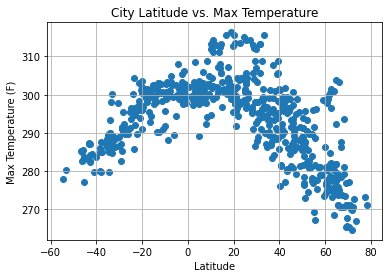

In [8]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.title(f'City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('Max_temp.png')

## Latitude vs. Humidity Plot

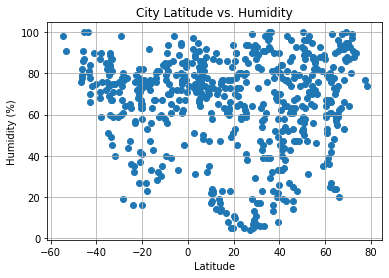

In [9]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png')

## Latitude vs. Cloudiness Plot

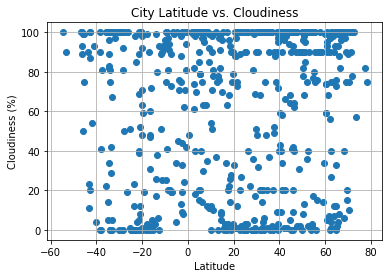

In [10]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_clouds.png')

## Latitude vs. Wind Speed Plot

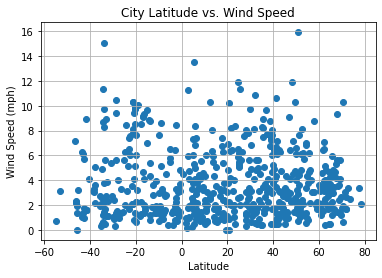

In [11]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_windspd.png')

## Linear Regression

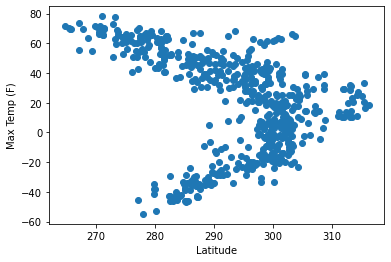

In [12]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['Max Temp']
y_values = city_data_df['Lat']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

In [13]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_df['Max Temp'],city_data_df['Lat'])

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      -0.192859
1      18.356991
2      13.662532
3      39.000175
4      14.688473
         ...    
565    16.170389
566    21.569535
567    -4.669694
568    13.849067
569    23.134354
Name: Max Temp, Length: 570, dtype: float64


In [14]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.04x +322.38


In [22]:
# Create Northern and Southern Hemisphere DataFrames
northeren_hemisphere = city_data_df[city_data["Lat"] >=0]
northern_cities_count =len(northeren_hemisphere)
print("There are {} cities in the northeren hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
       .format(northern_cities_count, city_left_count, (northern_cities_count/city_left_count)))


NameError: name 'city_data' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.10894824626084874


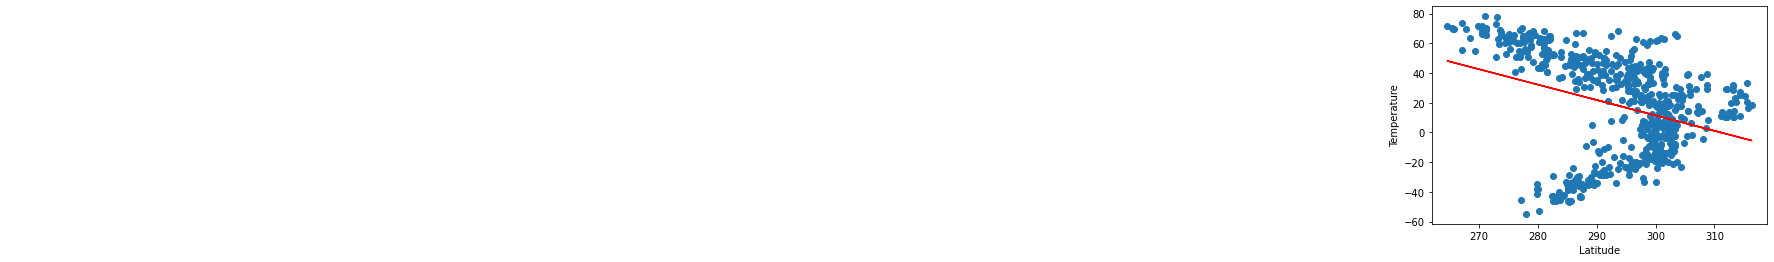

In [24]:
#Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression